In [ ]:
!pip install opencv-contrib-python

In [1]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

%cd opencv
!mkdir build
%cd build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..
!make -j8
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  7%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  8%] Linking CXX executable 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#***SIFT***

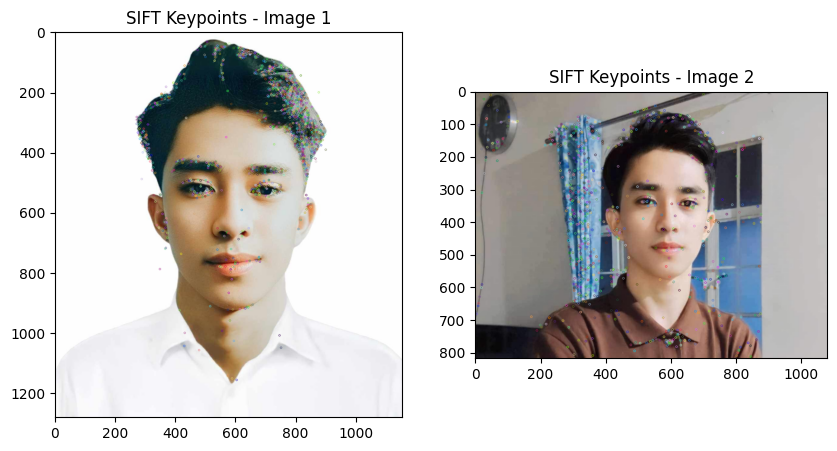

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('/content/drive/MyDrive/IMAGES/original_image1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/IMAGES/original_image2.jpg')

# Convert both images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# Draw keypoints on both images
image_with_keypoints1 = cv2.drawKeypoints(image1, keypoints1, None)
image_with_keypoints2 = cv2.drawKeypoints(image2, keypoints2, None)

# Display the first image with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_with_keypoints1, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints - Image 1')

# Display the second image with keypoints
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_keypoints2, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints - Image 2')

plt.show()


#***SURF***

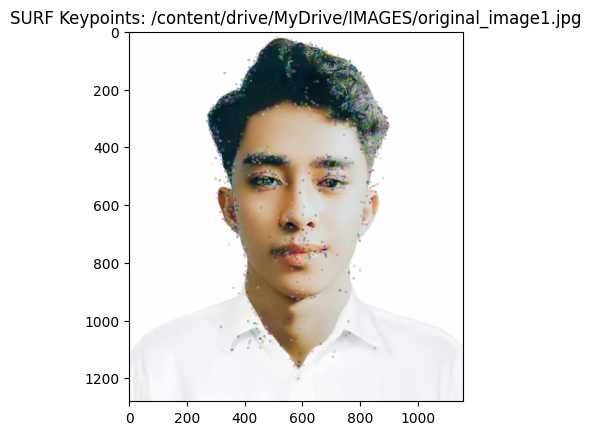

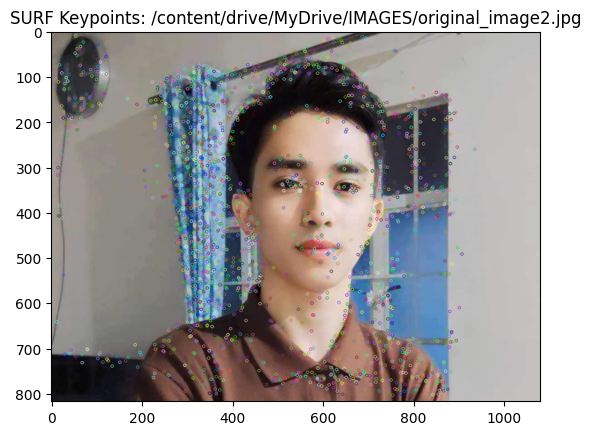

In [5]:
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Initialize SURF detector (make sure you have opencv-contrib-python installed)
    surf = cv2.xfeatures2d.SURF_create()

    # Detect keypoints and descriptors
    keypoints, descriptors = surf.detectAndCompute(gray_image, None)

    # Draw keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

    # Display the image with keypoints
    plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title(f'SURF Keypoints: {image_path}')
    plt.show()

# List of image paths
image_paths = ['/content/drive/MyDrive/IMAGES/original_image1.jpg', '/content/drive/MyDrive/IMAGES/original_image2.jpg']

# Process each image
for image_path in image_paths:
    process_image(image_path)


#***ORB***

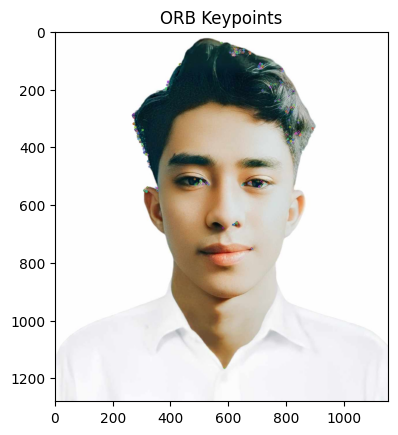

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('original_image1.jpg')
image2 = cv2.imread('original_image2.jpg')

# Convert both images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

# Draw keypoints on both images
image_with_keypoints1 = cv2.drawKeypoints(image1, keypoints1, None)
image_with_keypoints2 = cv2.drawKeypoints(image2, keypoints2, None)

# Display the first image with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_with_keypoints1, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints - Image 1')

# Display the second image with keypoints
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_keypoints2, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints - Image 2')

plt.show()